____________________________________________________________________________
Physics 474 - Spring 2023 <br>

Homework 5 - Solving SHO Time Independent Schrodinger Equation (TISE)<br>
eigenvalue equation

Solution

<font color='red'>Author: Djamil Lakhdar-Hamina


____________________________________________________________________

Simple example of solving Time Independent Schrodinger Equation (TISE)<br>
eigenvalue equation

$\hat{H}\Psi(x)=E\Psi(x)$ 

for the simple harmonic oscillator potential.

$\begin{eqnarray} 
V(x) &=& \frac{1}{2} k x^2 &=& \frac{1}{2} m \omega^2 x^2
\end{eqnarray}$

where $m$ is the mass of the particle in the potential and $\omega$ is the characteristic angular frequency given by  the "stiffness" $k$ of the potential.

$\omega = \sqrt{\frac{k}{m}}$

____________________________________________________________________________

Recall that the QM Hamiltonian is given by

$\hat{H}=T+V=-\frac{\hbar^2}{2m}\nabla^2+V$

Like we saw in the example for the infinite well we can represent the space centered finite difference $\nabla^2$ in 1D by an $nxn$ matrix

$\nabla^2= \frac{\partial^2}{\partial x^2}=
\frac{1}{a^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}$

where we put the problem on a grid of $n$ points in $x$ with spacing $a$.


Then for the Hamiltonian we have

$\hat{H}=T+V=-\frac{\hbar^2}{2m}\nabla^2+V = \frac{-\hbar^2}{2ma^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}  + \frac{m\omega^2}{2}\begin{pmatrix}
x_1^2& 0 & 0& 0&0&\ldots \\
0 &x_2^2 & 0 &0 &0 &\ldots\\
0 & 0 & x_3^2& 0 & 0 & \ldots \\
0 & 0 &0&x_4^2&0&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix} 
$

Which gives us the eigenvalue equation
    
 $ \frac{-\hbar^2}{2ma^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}\begin{pmatrix}
\psi(x_0,t)\\ \psi(x_1,t)\\ \psi(x_2,t)\\ \vdots \\ \\ \\ \psi(x_n,t)
\end{pmatrix}  + 
\frac{m\omega^2}{2}\begin{pmatrix}
x_1^2& 0 & 0& 0&0&\ldots \\
0 &x_2^2 & 0 &0 &0 &\ldots\\
0 & 0 & x_3^2& 0 & 0 & \ldots \\
0 & 0 &0&x_4^2&0&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix} \begin{pmatrix}
\psi(x_0,t)\\ \psi(x_1,t)\\ \psi(x_2,t)\\ \vdots \\ \\ \\ \psi(x_n,t)
\end{pmatrix} =  E\begin{pmatrix}
\psi(x_0,t)\\ \psi(x_1,t)\\ \psi(x_2,t)\\ \vdots \\ \\ \\ \psi(x_n,t)
\end{pmatrix}  
$



_________________________________________________________
For this problem we will use atomic units ($au$)  where $m_e=1$, $\hbar =1$. (you can look this up on the web if you want more details)

we will assume:
- $m=1\, au$
- $\omega =1 \, au$

and use:
- $-10\, au \leq x \leq 10\, au$ in 2000 steps
- cut off the potential at a maximum of $15\,au$

Part 1: (7 points)

I want you to:
- print out the first  8 energy levels $E_n$ in $au$, $eV$ and $Joules$ to 4 decimal places.

1 a.u. = 4.35974E-18 Joule <br>
1 eV = 1.60217663E-19 Joule <br>
1 a.u. = 4.35974E-18 J / 1.60217663E-19 J/eV = 27.2113 eV



In [2]:
import numpy as np 
import scipy.linalg as la
import matplotlib.pyplot as plt 

N=2000
x_min=-10.0
x_max=10.0
x=np.linspace(x_min,x_max,N)
dx=x[1]-x[0]

laplacian= (np.diag(-2.0*np.ones(N))+np.diag(np.ones(N-1),1)+ \
    np.diag(np.ones(N-1),-1))/dx**2
   
ϕ=np.zeros((N,N))
ϕ=ϕ+np.diag(x**2)

for i in range(0,N):
    for j in range(0,N): 
        if ϕ[i][j]>=15.0:
            ϕ[i][j]=15.0

hamiltonian=(1/2)*(-laplacian+ϕ)
E,V=la.eigh(hamiltonian)

print("\nCalculated {:g} bound states".format(len(E)),"\n")

for i in range(0,8):
    # #count number of bound states
    print(f'E{i+1} in au: ',round(E[i],4),"au")
    print(f'E{i+1} in eV: ',round(E[i]*27.2113,4),"eV")
    print(f'E{i+1} in J: ',E[i]*27.2113*1.6E-19,"J")
    print("\n")



Calculated 2000 bound states 

E1 in au:  0.5 au
E1 in eV:  13.6056 eV
E1 in J:  2.176890280150548e-18 J


E2 in au:  1.5 au
E2 in eV:  40.8165 eV
E2 in J:  6.5306404292339444e-18 J


E3 in au:  2.4999 au
E3 in eV:  68.0268 eV
E3 in J:  1.0884285557455877e-17 J


E4 in au:  3.4998 au
E4 in eV:  95.2336 eV
E4 in J:  1.5237382312839393e-17 J


E5 in au:  4.4988 au
E5 in eV:  122.4185 eV
E5 in J:  1.9586967527796446e-17 J


E6 in au:  5.4935 au
E6 in eV:  149.4852 eV
E6 in J:  2.3917630129112098e-17 J


E7 in au:  6.4678 au
E7 in eV:  175.9973 eV
E7 in J:  2.8159561505522416e-17 J


E8 in au:  7.3365 au
E8 in eV:  199.6366 eV
E8 in J:  3.1941855923692087e-17 J




________________________________________________________
- How do these energies compare to what you expect from the exact solution $E_n=(n+\frac{1}{2})\hbar\omega$? (easiest to use atomic units in making this observation)
- What could you do to improve the accuracy?

The energies are extremely close to the values. The way to improve the accuracy is to increase N, the number of elements in the NxN laplacian and potential matrices. Error seems to increase however as the energy level goes up. 


___________________________________________________________

________________________________________________
Part 2: (8 points)

- make a plot of the potential
- on the same plot as the potential, plot the first 8 eigenfunctions $\psi_n(x)$, each centered at the energy level $E_n$. NOTE: normalize the maximum of each wavefunction to 0.4 in your plotting.

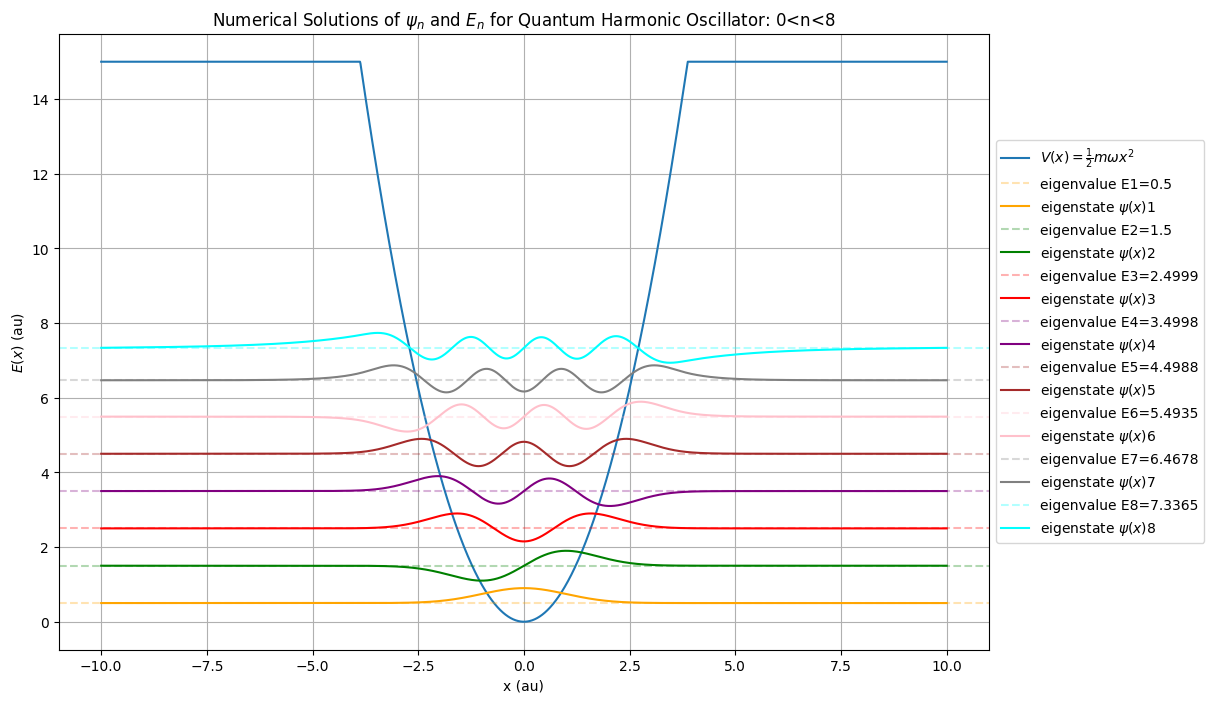

In [5]:
# Your code here...

v=np.zeros(N)

for i in range(0,N):
    v[i]=ϕ[i][i]

plt.figure(figsize=(12,8))
plt.plot(x,v,label=r'$V(x)=\frac{1}{2}mωx^2$')
colorbank=['orange','green','red','purple','brown','pink','grey','cyan']
for i in range(0,8):
    plt.axhline(E[i],label=f"eigenvalue E{i+1}={round(E[i],4)}",linestyle='--',color=colorbank[i],alpha=.3)
    plt.plot(x,(.4*V[:,i]/max(V[:,i]))+E[i],label=r"eigenstate $\psi(x)$"+f"{i+1}",color=colorbank[i])
    
plt.grid('--')
plt.legend(fancybox=True,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r"Numerical Solutions of $\psi_n$ and $E_n$ for Quantum Harmonic Oscillator: 0<n<8")
plt.xlabel("x (au)")
plt.ylabel(r"$E(x)$ (au)")
plt.show()

_______________________________________________________________
- How do these solutions for $\psi_n(x)$ compare qualitatively to the exact solutions?

____________________________________________________________________